In [1]:
# pip install scikit-learn --upgrade

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score
from xgboost import XGBClassifier

In [3]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
X = pd.concat([X_nt, X_t])
y = X.pop('RECURRENCE')
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [4]:
# FIRST I SHALL TEST THE FIRST RUN WITH LEARNING_RATE, N_ESTIMATORS AND MAX_DEPTH WITH DIFFERENT METRICS,
# AND SEE WHICH ONES TAKES ME IN THE RIGHT DIRECTION

In [5]:
X_nt

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
141,52,0,0,0,0,0,1,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
297,61,0,1,0,0,0,0,0,0.0,1,...,0,1,0,1,0,1,0,0,1,0
670,58,0,0,0,0,1,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
364,75,0,1,0,1,0,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
392,17,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,50,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,0,1
325,50,0,1,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,1,0,0
608,44,0,0,0,0,1,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
664,63,0,0,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0


In [92]:
def grid_searcher(param_grid, pipeline, scoring = 'recall', X_nt = X_nt, y_nt = y_nt, cv = 5, verbose = 1):
    tic = time.time()
    grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_nt, y_nt)
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    toc = time.time()
    print("Time Taken:", toc - tic)
    return best_params, best_model

In [ ]:
def model_test(best_model, X_t = X_t, y_t = y_t):
    y_pred_test = best_model.predict(X_t)
    report_test = classification_report(y_t, y_pred_test)
    print("Classification Report on Test Set:")
    print(report_test)
    cm = confusion_matrix(y_t, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [7]:
model1 = XGBClassifier(random_state = 42)
imputer1 = SimpleImputer(strategy = 'median')
pipeline1 = Pipeline([
    ('imputer', imputer1),
    ('model', model1)
])

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       183
           1       0.44      0.15      0.23        26

    accuracy                           0.87       209
   macro avg       0.67      0.56      0.58       209
weighted avg       0.83      0.87      0.84       209



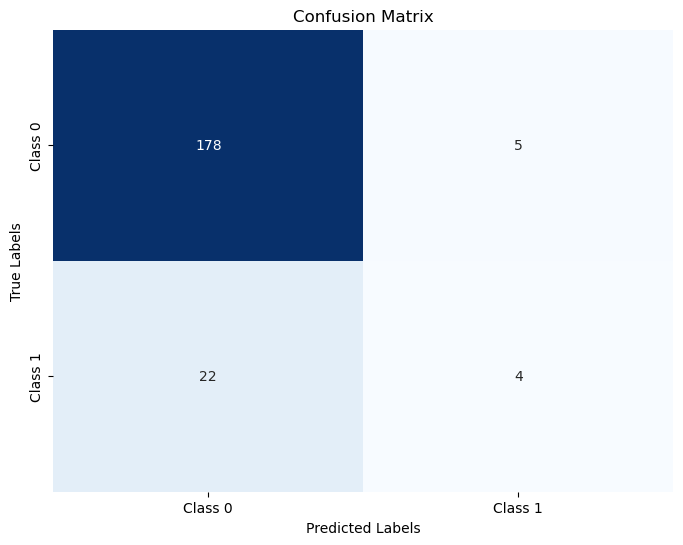

In [8]:
pipeline1.fit(X_nt, y_nt)
model_test(pipeline1)

In [95]:
param_grid1 = {
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [50, 75, 100, 125, 150],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0, 0.5, 1, 1.5]
}

In [22]:
# MATTHEWS_CORRCOEF

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.06999999999999999, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__reg_lambda': 0}
Time Taken: 125.18034243583679
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



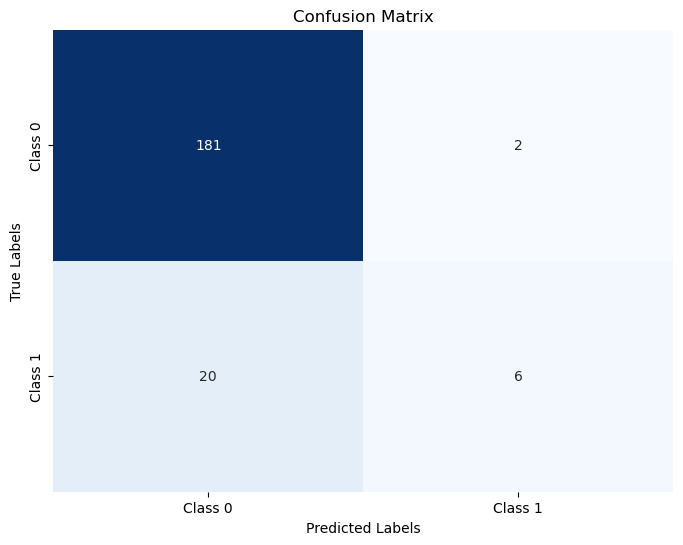

In [23]:
best_params1, best_model1 = grid_searcher(param_grid1, pipeline1, 'matthews_corrcoef')
model_test(best_model1)

Fitting 5 folds for each of 2340 candidates, totalling 11700 fits
Best Hyperparameters: {'model__learning_rate': 0.125, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__reg_lambda': 1.5}
Time Taken: 107.31802797317505
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



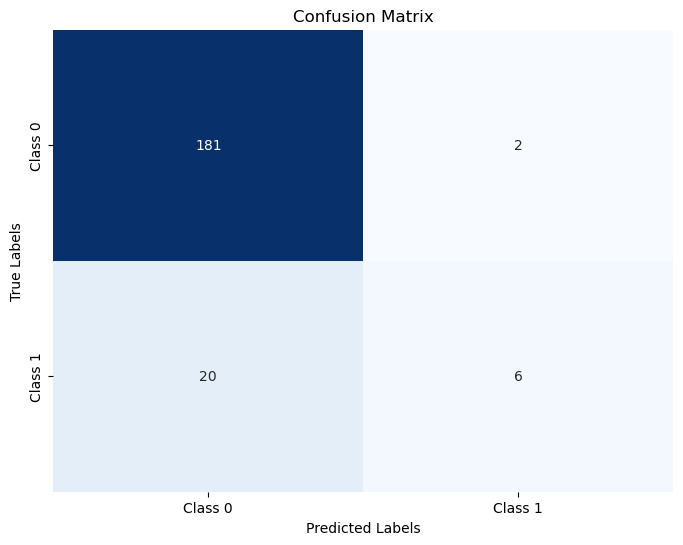

In [27]:
param_grid1a = {
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [75, 100, 125, 150, 175],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [1, 1.5, 2]
}
best_params1a, best_model1a = grid_searcher(param_grid1a, pipeline1, 'matthews_corrcoef')
model_test(best_model1a)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 9.480867624282837
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



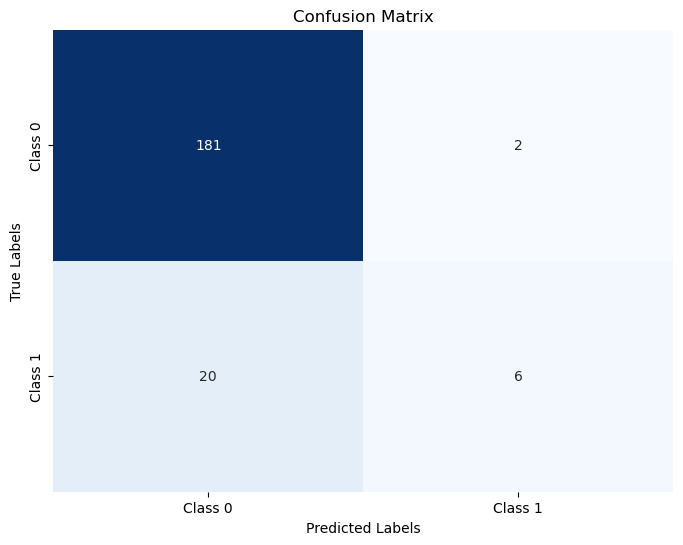

In [28]:
param_grid1b = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1, 'matthews_corrcoef')
model_test(best_model1b)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 2.4161369800567627
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



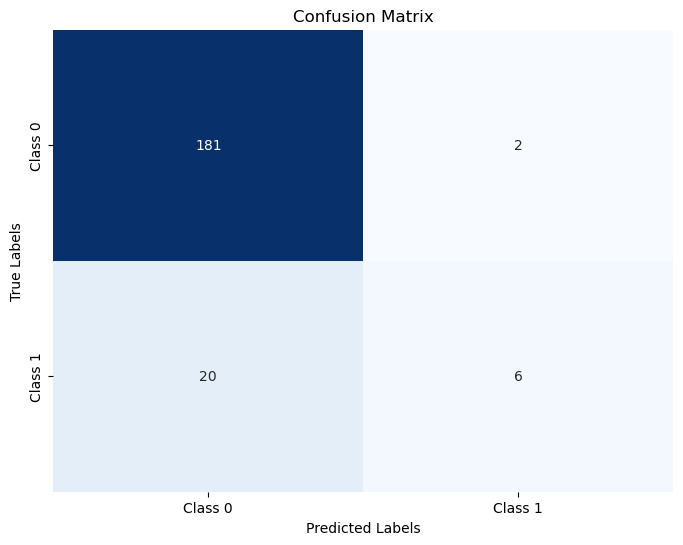

In [29]:
param_grid1ab = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}
best_params1ab, best_model1ab = grid_searcher(param_grid1ab, best_model1a, 'matthews_corrcoef')
model_test(best_model1ab)

Fitting 5 folds for each of 6750 candidates, totalling 33750 fits
Best Hyperparameters: {'model__gamma': 0, 'model__lambda': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 1, 'model__scale_pos_weight': 1}
Time Taken: 203.70110321044922
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



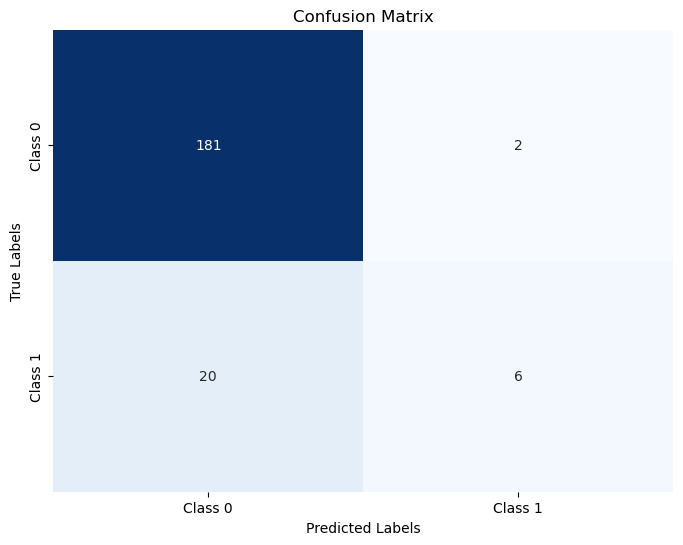

In [31]:
param_grid1c = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [0, 1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__lambda': [0, 0.25, 0.5, 0.75, 1.0 ,1.25, 1.5, 1.75, 2]
}
best_params1c, best_model1c = grid_searcher(param_grid1c, best_model1b, 'matthews_corrcoef')
model_test(best_model1c)

Fitting 5 folds for each of 6750 candidates, totalling 33750 fits
Best Hyperparameters: {'model__gamma': 1, 'model__lambda': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 2, 'model__scale_pos_weight': 2}
Time Taken: 140.85942578315735
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       183
           1       0.65      0.42      0.51        26

    accuracy                           0.90       209
   macro avg       0.78      0.70      0.73       209
weighted avg       0.89      0.90      0.89       209



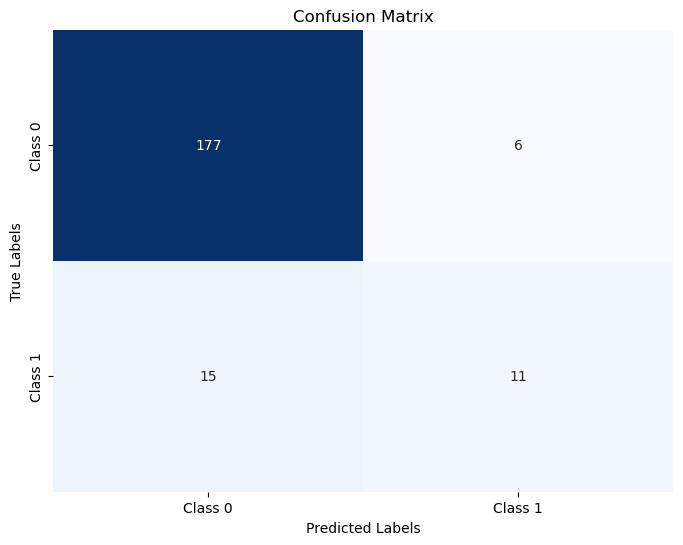

In [32]:
param_grid1ac = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [0, 1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__lambda': [0, 0.25, 0.5, 0.75, 1.0 ,1.25, 1.5, 1.75, 2]
}
best_params1ac, best_model1ac = grid_searcher(param_grid1ac, best_model1ab, 'matthews_corrcoef')
model_test(best_model1ac)

Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
Best Hyperparameters: {'model__gamma': 1, 'model__lambda': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 2, 'model__scale_pos_weight': 2}
Time Taken: 276.93742322921753
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       183
           1       0.65      0.42      0.51        26

    accuracy                           0.90       209
   macro avg       0.78      0.70      0.73       209
weighted avg       0.89      0.90      0.89       209



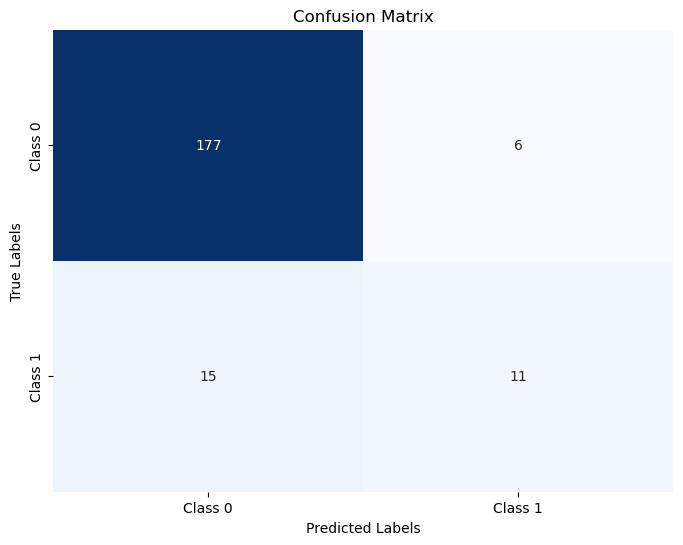

In [38]:
param_grid1ad = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [0, 1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__lambda': [0, 0.25, 0.5, 0.75, 1.0 ,1.25, 1.5, 1.75, 2]
}
best_params1ad, best_model1ad = grid_searcher(param_grid1ad, best_model1ac, 'matthews_corrcoef')
model_test(best_model1ad)

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       607
           1       0.75      0.51      0.60        87

    accuracy                           0.92       694
   macro avg       0.84      0.74      0.78       694
weighted avg       0.91      0.92      0.91       694



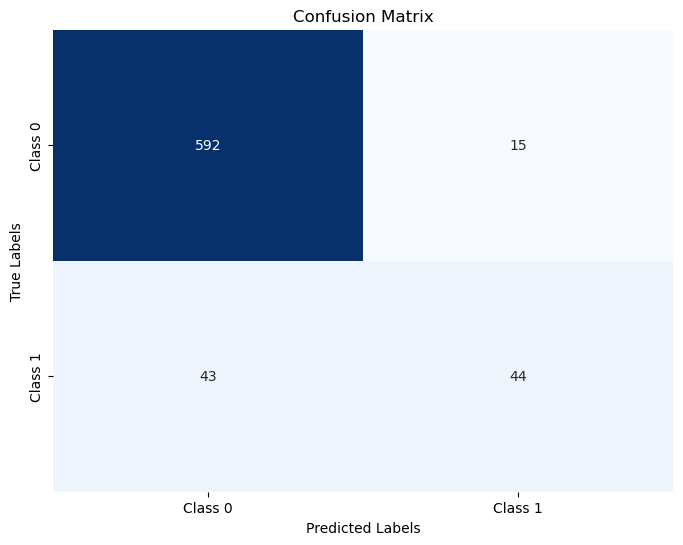

In [41]:
y_pred = best_model1ad.predict(X)
report = classification_report(y, y_pred)
print("Classification Report on Test Set:")
print(report)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
X['RECURRENCE'] = y
X.sort_index(inplace = True)

In [10]:
data = X.copy()

In [11]:
# there is no error in the datasets.

In [12]:
def box_plotter(column):
    # Create a box plot for the categorical variable 'Category' and numerical variable 'Value'
    plt.figure(figsize=(16, 6))
    # Subplot 1: Box plot with annotations
    plt.subplot(1, 2, 1)
    # Get numerical positions for each category
    category_positions = {category: i for i, category in enumerate(data['RECURRENCE'].unique())}
    sns.boxplot(x='RECURRENCE', y=column, data=data)
    # Create a table for annotations
    annotation_table = pd.DataFrame(columns=['RECURRENCE', 'Count', 'Mean', 'Std', 'Median', 'Q1', 'Q3', 'Min', 'Max', 'Outliers'])
    # Annotate the box plot with numerical values and outliers, and update the table
    for category in data['RECURRENCE'].unique():
        subset = data[data['RECURRENCE'] == category]
        count = subset[column].count()
        mean = subset[column].mean()
        std = subset[column].std()
        median = subset[column].median()
        q1 = subset[column].quantile(0.25)
        q3 = subset[column].quantile(0.75)
        minimum = subset[column].min()
        maximum = subset[column].max()
        # Identify outliers using 1.5*IQR criterion
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = subset[(subset[column] < lower_bound) | (subset[column] > upper_bound)][column].tolist()
        outliers.sort()
        # Add data to the table
        annotation_table = pd.concat([annotation_table, pd.DataFrame({
            'RECURRENCE': [category],
            'Count': [count],
            'Mean': [mean],
            'Std': [std],
            'Median': [median],
            'Q1': [q1],
            'Q3': [q3],
            'Min': [minimum],
            'Max': [maximum],
            'Outliers': [outliers]
        })], ignore_index=True)    
    # Display the table
    display(annotation_table)
    plt.title(f'Box Plot of {column} with Split Based on Recurrence')
    # Subplot 2: Box plot for comparison
    plt.subplot(1, 2, 2)
    sns.boxplot(y=column, data=data)
    plt.title(f'Box Plot of {column} without Annotations')
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
    # Table for column variable without 'RECURRENCE'
    age_table = data[column].describe().reset_index().rename(columns={'index': 'Statistic'})
    print(age_table)
    # age_table = data[column].describe().reset_index().rename(columns={'index': 'Statistic'}).T
    # outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column].tolist()
    # age_table['Outliers'] = ', '.join(map(str, outliers))
    # print(age_table)

C:\Users\aniru\AppData\Local\Temp\ipykernel_26144\3329268959.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  annotation_table = pd.concat([annotation_table, pd.DataFrame({


,RECURRENCE,Count,Mean,Std,Median,Q1,Q3,Min,Max,Outliers
0,0,607,53.896211,13.195313,55.0,45.0,63.0,12,89,"[12, 17]"
1,1,87,55.655172,9.947335,55.0,49.5,60.0,26,78,"[26, 78]"


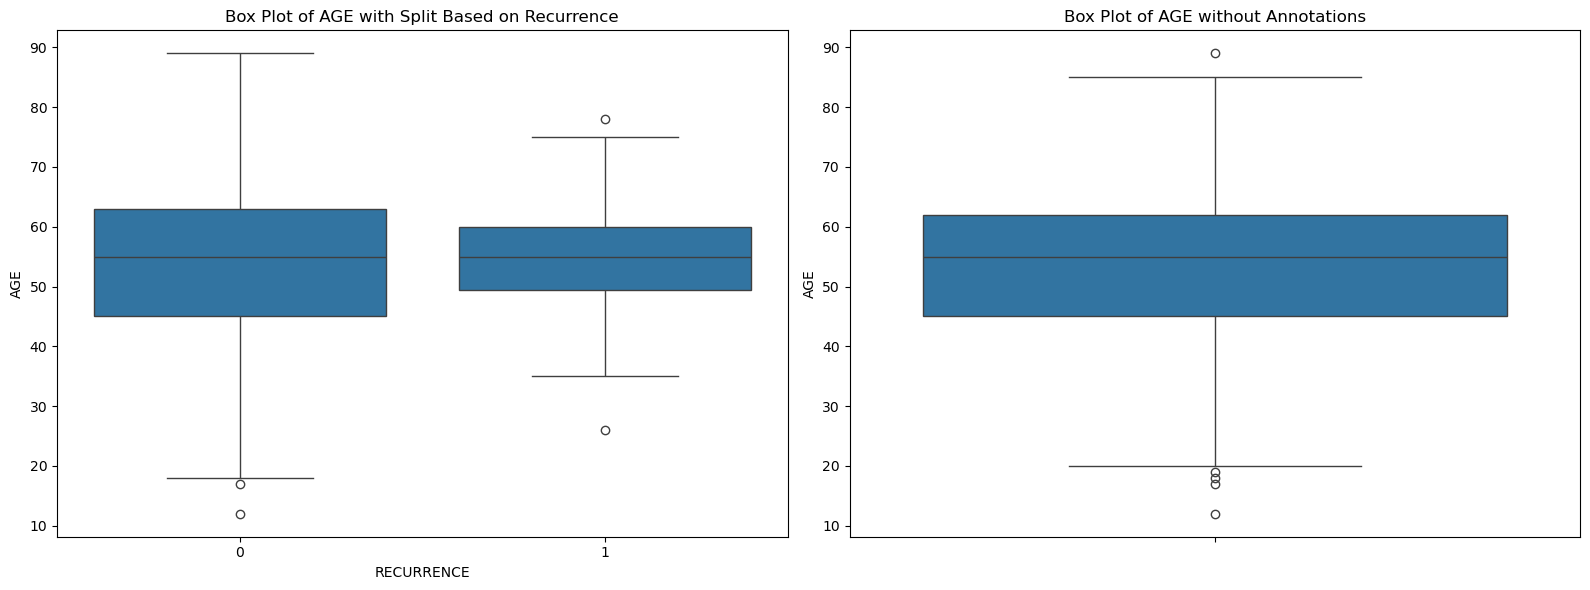

  Statistic         AGE
0     count  694.000000
1      mean   54.116715
2       std   12.840432
3       min   12.000000
4       25%   45.000000
5       50%   55.000000
6       75%   62.000000
7       max   89.000000


In [13]:
box_plotter('AGE')

C:\Users\aniru\AppData\Local\Temp\ipykernel_26144\3329268959.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  annotation_table = pd.concat([annotation_table, pd.DataFrame({


,RECURRENCE,Count,Mean,Std,Median,Q1,Q3,Min,Max,Outliers
0,0,607,6.509885,3.265870,6.0,4.0,8.2,0.8,29.0,"[15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 17.0, 17...."
1,1,87,7.742529,3.699486,7.0,5.0,10.0,2.0,19.0,"[18.2, 19.0]"


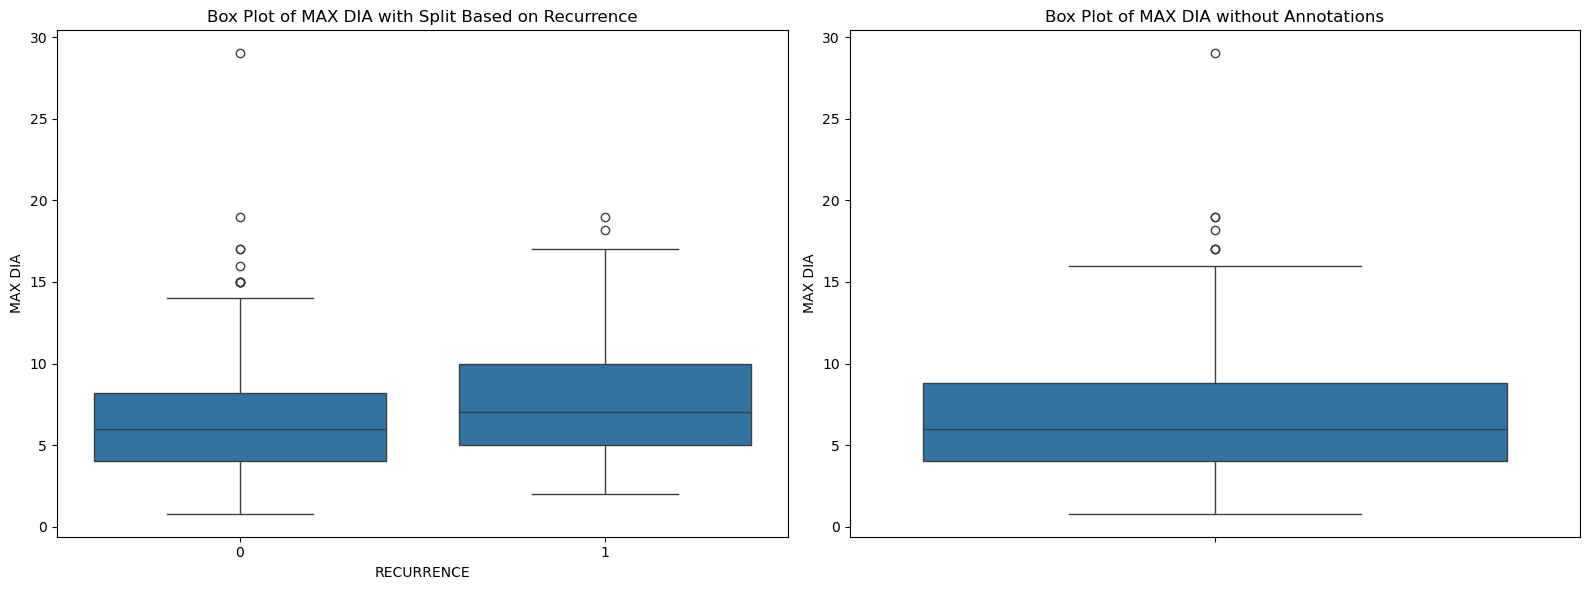

  Statistic     MAX DIA
0     count  694.000000
1      mean    6.664409
2       std    3.345469
3       min    0.800000
4       25%    4.000000
5       50%    6.000000
6       75%    8.800000
7       max   29.000000


In [14]:
box_plotter('MAX DIA')

In [15]:
data.loc[data['MAX DIA'] == data['MAX DIA'].max(), :]

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3,RECURRENCE
83,19,0,0,0,0,0,0,1,0.0,0,...,0,0,0,1,1,0,1,0,0,0


In [16]:
data.loc[83, 'MAX DIA']

29.0

In [17]:
83 in X_nt.index

True

C:\Users\aniru\AppData\Local\Temp\ipykernel_26144\3329268959.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  annotation_table = pd.concat([annotation_table, pd.DataFrame({


,RECURRENCE,Count,Mean,Std,Median,Q1,Q3,Min,Max,Outliers
0,0,607,52.436573,21.103599,52.0,34.0,68.0,18,95,[]
1,1,87,53.724138,16.369064,51.0,42.0,65.0,30,95,[]


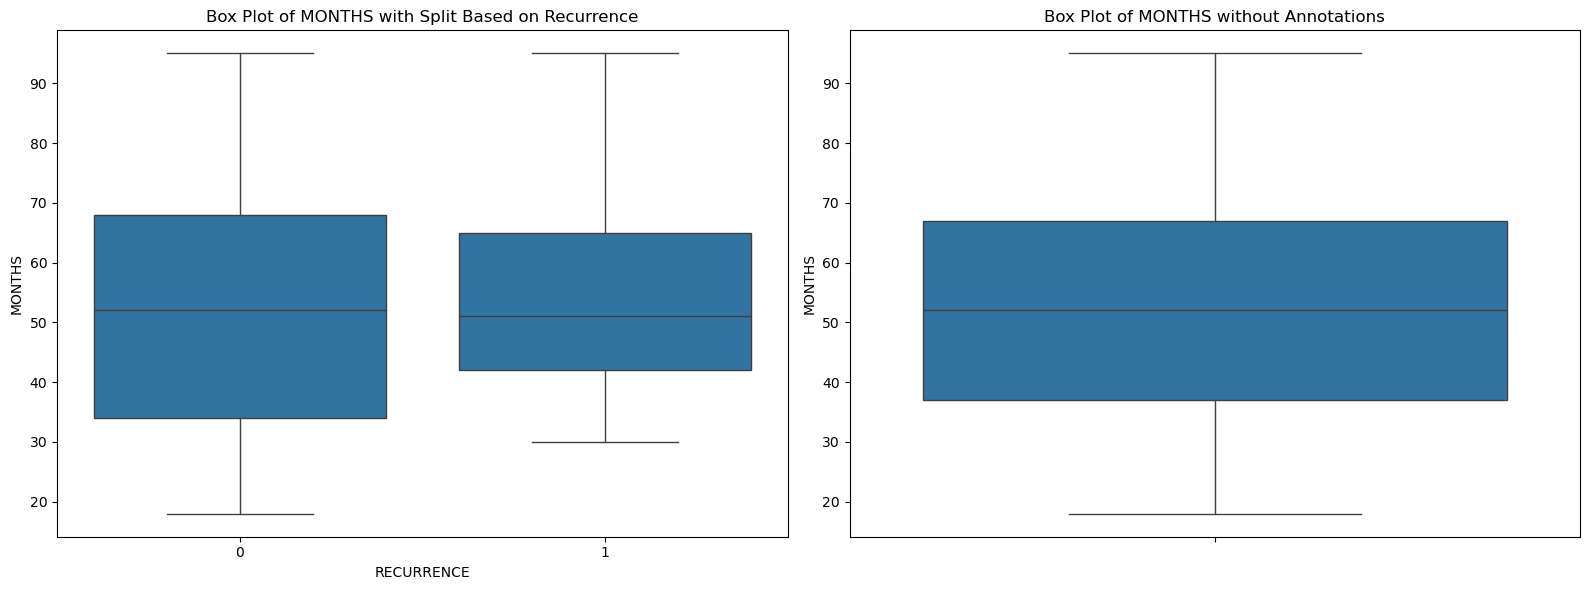

  Statistic      MONTHS
0     count  694.000000
1      mean   52.597983
2       std   20.564151
3       min   18.000000
4       25%   37.000000
5       50%   52.000000
6       75%   67.000000
7       max   95.000000


In [18]:
box_plotter('MONTHS')

In [19]:
data = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_cleaned_data.csv") #, index_col = 0)
data = data.drop(0, axis = 0)
data = data.reset_index(drop = True)

In [20]:
data.loc[63, 'LOW'] = 0
data.LOW = data.LOW.astype('int64')

In [21]:
data.loc[data['GRADE'].isna(), 'GRADE'] = 2
data.GRADE = data.GRADE.astype('int64')

In [22]:
T_encoding = {'1a':0, '1b':1, '2a':2, '2b':3, '3a':4, '3b':5, '3c':6, '4':7}
data['T'] = data['T'].replace(T_encoding)

In [23]:
target = data.pop("RECURRENCE")

In [24]:
def make_mi_scores(data, target, discrete_features):
    mi_scores = mutual_info_classif(data, target, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=data.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [25]:
for colname in data.select_dtypes("object"):
    data[colname], _ = data[colname].factorize()

In [26]:
discrete_vars = data.dtypes == 'int64'

In [27]:
discrete_vars

AGE                True
SEX                True
DM                 True
HTN                True
CKD                True
INCIDENTAL         True
PAIN               True
HEMATURIA          True
MASS               True
LOW                True
FEVER              True
SITE               True
T                  True
N                  True
M                  True
IVC INV            True
MAX DIA           False
APPROACH           True
HISTOPATHOLOGY     True
GRADE              True
MONTHS             True
dtype: bool

In [28]:
data

,AGE,SEX,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,...,SITE,T,N,M,IVC INV,MAX DIA,APPROACH,HISTOPATHOLOGY,GRADE,MONTHS
0,45,0,0,0,0,0,1,1,0,0,...,0,7,1,1,0,4.9,1,0,2,95
1,47,1,0,0,0,1,0,0,0,0,...,0,5,0,1,1,9.0,1,0,3,95
2,58,1,0,0,0,0,0,1,0,0,...,0,4,0,0,0,7.0,2,0,2,95
3,22,1,0,0,0,0,1,0,0,0,...,1,3,0,0,0,10.4,1,0,2,94
4,42,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,3.0,1,0,2,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,64,1,0,0,0,0,1,0,0,0,...,0,4,0,0,0,8.0,1,0,4,18
690,49,1,0,0,0,0,0,1,0,0,...,0,2,0,0,0,10.0,1,0,3,18
691,73,1,0,1,0,0,0,1,0,0,...,0,5,0,0,1,7.5,2,0,1,18
692,65,0,0,0,0,0,1,0,0,0,...,1,4,0,0,0,10.0,1,0,1,18


In [29]:
for col in data.columns:
    print(col, ":", data[col].dtype)

AGE : int64
SEX : int64
DM : int64
HTN : int64
CKD : int64
INCIDENTAL : int64
PAIN : int64
HEMATURIA : int64
MASS : int64
LOW : int64
FEVER : int64
SITE : int64
T : int64
N : int64
M : int64
IVC INV : int64
MAX DIA : float64
APPROACH : int64
HISTOPATHOLOGY : int64
GRADE : int64
MONTHS : int64


In [30]:
data.isna().sum().sum()

0

In [31]:
target

0      0
1      0
2      1
3      0
4      0
      ..
689    0
690    0
691    0
692    0
693    0
Name: RECURRENCE, Length: 694, dtype: int64

In [32]:
mi_scores = make_mi_scores(data, target, discrete_vars)
mi_scores # show a few features with their MI scores

MONTHS            9.391287e-02
AGE               5.394083e-02
MAX DIA           2.933891e-02
GRADE             2.285176e-02
T                 1.935491e-02
M                 7.701655e-03
APPROACH          6.660318e-03
IVC INV           4.895002e-03
HEMATURIA         4.343150e-03
INCIDENTAL        3.246111e-03
HTN               3.081931e-03
SITE              1.850640e-03
PAIN              1.528804e-03
SEX               1.322678e-03
HISTOPATHOLOGY    7.743973e-04
N                 2.208278e-04
DM                1.164130e-04
LOW               9.330469e-05
CKD               7.808279e-05
FEVER             2.852436e-06
MASS              1.397593e-08
Name: MI Scores, dtype: float64

In [33]:
mutual_info_classif(data, target)

array([0.01558558, 0.        , 0.03092055, 0.        , 0.01160484,
       0.        , 0.0119511 , 0.00312312, 0.        , 0.00781607,
       0.        , 0.01754206, 0.00820147, 0.        , 0.0175806 ,
       0.02691315, 0.03792755, 0.        , 0.00549687, 0.03595403,
       0.02176598])

In [73]:
# age_bins = pd.cut(data['AGE'], bins=10, labels=False)
# months_bins = pd.cut(data['MONTHS'], bins=10, labels=False)

# # Create a new DataFrame with the binned variables
# binned_data = data.copy()
# binned_data['AGE'] = age_bins
# binned_data['MONTHS'] = months_bins

# # Calculate mutual information using binned variables
# bin_dv = binned_data.dtypes == 'int64'
# bin_mi_scores = make_mi_scores(binned_data, target, bin_dv)
# bin_mi_scores
# doesn't improve

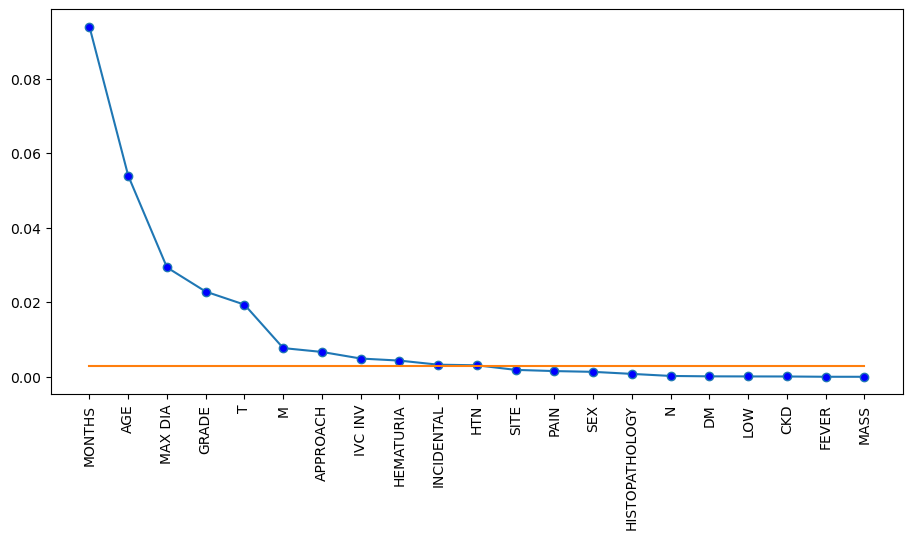

In [113]:
plt.figure(figsize = (11, 5))
plt.plot(mi_scores, marker = 'o', mfc = 'b')
plt.plot([3e-3 for x in range(len(mi_scores))])
plt.xticks(rotation = 90)
plt.show()

In [35]:
# WITHOUT AGE AND MONTHS BEING DISCRETE
discrete_vars[['AGE', 'MONTHS']] = False
cont_mi_scores = make_mi_scores(data, target, discrete_vars)
cont_mi_scores
# DOESN'T WORK
discrete_vars[['AGE', 'MONTHS']] = True

In [46]:
discrete_vars = list(set(data.columns) - set(['AGE', 'MONTHS', 'MAX DIA']))
# Create cross-tabulations for each pair of discrete variables
for i in range(len(discrete_vars)):
    for j in range(i + 1, len(discrete_vars)):
        cross_tab = pd.crosstab(data[discrete_vars[i]], [data[discrete_vars[j]], target], margins = True, margins_name = 'Total')

        # Optionally, you can add normalization to get proportions instead of frequencies
        # cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0)

        print(f"\nCross-Tabulation between {discrete_vars[i]} and {discrete_vars[j]}:\n")
        display(cross_tab)


Cross-Tabulation between DM and HEMATURIA:



HEMATURIA     0        1     Total
RECURRENCE    0   1    0   1      
DM                                
0           411  50  117  27   605
1            62   7   17   3    89
Total       473  57  134  30   694


Cross-Tabulation between DM and APPROACH:



APPROACH      1        2       3    Total
RECURRENCE    0   1    0   1   0  1      
DM                                       
0           197  39  266  35  65  3   605
1            31   5   33   4  15  1    89
Total       228  44  299  39  80  4   694


Cross-Tabulation between DM and N:



N             0       1    Total
RECURRENCE    0   1   0  1      
DM                              
0           494  71  34  6   605
1            74   9   5  1    89
Total       568  80  39  7   694


Cross-Tabulation between DM and SITE:



SITE          0        1      2    Total
RECURRENCE    0   1    0   1  0  1      
DM                                      
0           271  44  255  32  2  1   605
1            44   8   34   2  1  0    89
Total       315  52  289  34  3  1   694


Cross-Tabulation between DM and T:



T             0        1       2      3       4       5     6      7    Total
RECURRENCE    0   1    0   1   0  1   0  1    0   1   0  1  0  1   0  1      
DM                                                                           
0           147   8  139  15  67  7  20  3  121  33  16  4  1  3  17  4   605
1            19   2   21   3  13  1   1  0   16   3   5  1  2  0   2  0    89
Total       166  10  160  18  80  8  21  3  137  36  21  5  3  3  19  4   694


Cross-Tabulation between DM and INCIDENTAL:



INCIDENTAL    0        1     Total
RECURRENCE    0   1    0   1      
DM                                
0           358  61  170  16   605
1            42   6   37   4    89
Total       400  67  207  20   694


Cross-Tabulation between DM and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
DM                               
0           510  68  18   9   605
1            72   9   7   1    89
Total       582  77  25  10   694


Cross-Tabulation between DM and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
DM                              
0           493  73  35  4   605
1            73   9   6  1    89
Total       566  82  41  5   694


Cross-Tabulation between DM and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
DM                              
0           514  74  14  3   605
1            76  10   3  0    89
Total       590  84  17  3   694


Cross-Tabulation between DM and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
DM                              
0           503  73  25  4   605
1            77  10   2  0    89
Total       580  83  27  4   694


Cross-Tabulation between DM and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
DM                                
0           314  52  214  25   605
1            56   8   23   2    89
Total       370  60  237  27   694


Cross-Tabulation between DM and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
DM                              
0               524  77  4   605
1                79  10  0    89
Total           603  87  4   694


Cross-Tabulation between DM and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
DM                              
0           516  75  12  2   605
1            77  10   2  0    89
Total       593  85  14  2   694


Cross-Tabulation between DM and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
DM                                                
0           193  11  219  28  81  21  35  17   605
1            19   3   40   2  17   4   3   1    89
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between DM and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
DM                                
0           422  67  106  10   605
1            36   7   43   3    89
Total       458  74  149  13   694


Cross-Tabulation between DM and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
DM                              
0           462  75  66  2   605
1            70  10   9  0    89
Total       532  85  75  2   694


Cross-Tabulation between DM and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
DM                                
0           177  20  351  57   605
1            27   3   52   7    89
Total       204  23  403  64   694


Cross-Tabulation between HEMATURIA and APPROACH:



APPROACH      1        2       3    Total
RECURRENCE    0   1    0   1   0  1      
HEMATURIA                                
0           152  21  244  32  77  4   530
1            76  23   55   7   3  0   164
Total       228  44  299  39  80  4   694


Cross-Tabulation between HEMATURIA and N:



N             0       1    Total
RECURRENCE    0   1   0  1      
HEMATURIA                       
0           452  54  21  3   530
1           116  26  18  4   164
Total       568  80  39  7   694


Cross-Tabulation between HEMATURIA and SITE:



SITE          0        1      2    Total
RECURRENCE    0   1    0   1  0  1      
HEMATURIA                               
0           242  33  229  23  2  1   530
1            73  19   60  11  1  0   164
Total       315  52  289  34  3  1   694


Cross-Tabulation between HEMATURIA and T:



T             0        1       2      3       4       5     6      7    Total
RECURRENCE    0   1    0   1   0  1   0  1    0   1   0  1  0  1   0  1      
HEMATURIA                                                                    
0           158  10  141  14  57  7  13  3   77  19  12  0  3  2  12  2   530
1             8   0   19   4  23  1   8  0   60  17   9  5  0  1   7  2   164
Total       166  10  160  18  80  8  21  3  137  36  21  5  3  3  19  4   694


Cross-Tabulation between HEMATURIA and INCIDENTAL:



INCIDENTAL    0        1     Total
RECURRENCE    0   1    0   1      
HEMATURIA                         
0           266  37  207  20   530
1           134  30    0   0   164
Total       400  67  207  20   694


Cross-Tabulation between HEMATURIA and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
HEMATURIA                        
0           458  54  15   3   530
1           124  23  10   7   164
Total       582  77  25  10   694


Cross-Tabulation between HEMATURIA and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
HEMATURIA                       
0           440  52  33  5   530
1           126  30   8  0   164
Total       566  82  41  5   694


Cross-Tabulation between HEMATURIA and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
HEMATURIA                       
0           463  57  10  0   530
1           127  27   7  3   164
Total       590  84  17  3   694


Cross-Tabulation between HEMATURIA and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
HEMATURIA                       
0           449  53  24  4   530
1           131  30   3  0   164
Total       580  83  27  4   694


Cross-Tabulation between HEMATURIA and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
HEMATURIA                         
0           258  31  215  26   530
1           112  29   22   1   164
Total       370  60  237  27   694


Cross-Tabulation between HEMATURIA and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
HEMATURIA                       
0               470  57  3   530
1               133  30  1   164
Total           603  87  4   694


Cross-Tabulation between HEMATURIA and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
HEMATURIA                       
0           460  55  13  2   530
1           133  30   1  0   164
Total       593  85  14  2   694


Cross-Tabulation between HEMATURIA and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
HEMATURIA                                         
0           178  13  192  19  75  17  28   8   530
1            34   1   67  11  23   8  10  10   164
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between HEMATURIA and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
HEMATURIA                         
0           350  44  123  13   530
1           108  30   26   0   164
Total       458  74  149  13   694


Cross-Tabulation between HEMATURIA and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
HEMATURIA                       
0           424  56  49  1   530
1           108  29  26  1   164
Total       532  85  75  2   694


Cross-Tabulation between HEMATURIA and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
HEMATURIA                         
0           167  17  306  40   530
1            37   6   97  24   164
Total       204  23  403  64   694


Cross-Tabulation between APPROACH and N:



N             0       1    Total
RECURRENCE    0   1   0  1      
APPROACH                        
1           195  37  33  7   272
2           293  39   6  0   338
3            80   4   0  0    84
Total       568  80  39  7   694


Cross-Tabulation between APPROACH and SITE:



SITE          0        1      2    Total
RECURRENCE    0   1    0   1  0  1      
APPROACH                                
1           125  34  102   9  1  1   272
2           142  15  156  24  1  0   338
3            48   3   31   1  1  0    84
Total       315  52  289  34  3  1   694


Cross-Tabulation between APPROACH and T:



T             0        1       2      3       4       5     6      7    Total
RECURRENCE    0   1    0   1   0  1   0  1    0   1   0  1  0  1   0  1      
APPROACH                                                                     
1            22   3   37   5  43  2  15  2   72  21  19  4  3  3  17  4   272
2           117   6   79  11  31  6   4  1   64  14   2  1  0  0   2  0   338
3            27   1   44   2   6  0   2  0    1   1   0  0  0  0   0  0    84
Total       166  10  160  18  80  8  21  3  137  36  21  5  3  3  19  4   694


Cross-Tabulation between APPROACH and INCIDENTAL:



INCIDENTAL    0        1     Total
RECURRENCE    0   1    0   1      
APPROACH                          
1           173  39   55   5   272
2           196  26  103  13   338
3            31   2   49   2    84
Total       400  67  207  20   694


Cross-Tabulation between APPROACH and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
APPROACH                         
1           205  36  23   8   272
2           297  37   2   2   338
3            80   4   0   0    84
Total       582  77  25  10   694


Cross-Tabulation between APPROACH and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
APPROACH                        
1           209  40  19  4   272
2           280  38  19  1   338
3            77   4   3  0    84
Total       566  82  41  5   694


Cross-Tabulation between APPROACH and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
APPROACH                        
1           217  42  11  2   272
2           297  38   2  1   338
3            76   4   4  0    84
Total       590  84  17  3   694


Cross-Tabulation between APPROACH and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
APPROACH                        
1           211  41  17  3   272
2           291  38   8  1   338
3            78   4   2  0    84
Total       580  83  27  4   694


Cross-Tabulation between APPROACH and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
APPROACH                          
1           143  36   85   8   272
2           170  22  129  17   338
3            57   2   23   2    84
Total       370  60  237  27   694


Cross-Tabulation between APPROACH and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
APPROACH                        
1               227  44  1   272
2               297  39  2   338
3                79   4  1    84
Total           603  87  4   694


Cross-Tabulation between APPROACH and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
APPROACH                        
1           218  43  10  1   272
2           296  38   3  1   338
3            79   4   1  0    84
Total       593  85  14  2   694


Cross-Tabulation between APPROACH and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
APPROACH                                          
1            45   4  108  11  51  15  24  14   272
2           127   8  119  18  39   9  14   4   338
3            40   2   32   1   8   1   0   0    84
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between APPROACH and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
APPROACH                          
1           168  41   60   3   272
2           240  30   59   9   338
3            50   3   30   1    84
Total       458  74  149  13   694


Cross-Tabulation between APPROACH and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
APPROACH                        
1           170  43  58  1   272
2           283  38  16  1   338
3            79   4   1  0    84
Total       532  85  75  2   694


Cross-Tabulation between APPROACH and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
APPROACH                          
1            75  10  153  34   272
2           103  11  196  28   338
3            26   2   54   2    84
Total       204  23  403  64   694


Cross-Tabulation between N and SITE:



SITE          0        1      2    Total
RECURRENCE    0   1    0   1  0  1      
N                                       
0           292  47  273  32  3  1   648
1            23   5   16   2  0  0    46
Total       315  52  289  34  3  1   694


Cross-Tabulation between N and T:



T             0        1       2      3       4       5     6      7    Total
RECURRENCE    0   1    0   1   0  1   0  1    0   1   0  1  0  1   0  1      
N                                                                            
0           166  10  156  18  74  7  19  2  124  32  17  5  3  3   9  3   648
1             0   0    4   0   6  1   2  1   13   4   4  0  0  0  10  1    46
Total       166  10  160  18  80  8  21  3  137  36  21  5  3  3  19  4   694


Cross-Tabulation between N and INCIDENTAL:



INCIDENTAL    0        1     Total
RECURRENCE    0   1    0   1      
N                                 
0           364  60  204  20   648
1            36   7    3   0    46
Total       400  67  207  20   694


Cross-Tabulation between N and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
N                                
0           548  70  20  10   648
1            34   7   5   0    46
Total       582  77  25  10   694


Cross-Tabulation between N and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
N                               
0           533  75  35  5   648
1            33   7   6  0    46
Total       566  82  41  5   694


Cross-Tabulation between N and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
N                               
0           553  77  15  3   648
1            37   7   2  0    46
Total       590  84  17  3   694


Cross-Tabulation between N and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
N                               
0           545  76  23  4   648
1            35   7   4  0    46
Total       580  83  27  4   694


Cross-Tabulation between N and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
N                                 
0           350  56  218  24   648
1            20   4   19   3    46
Total       370  60  237  27   694


Cross-Tabulation between N and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
N                               
0               565  80  3   648
1                38   7  1    46
Total           603  87  4   694


Cross-Tabulation between N and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
N                               
0           555  78  13  2   648
1            38   7   1  0    46
Total       593  85  14  2   694


Cross-Tabulation between N and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
N                                                 
0           209  14  241  29  92  24  26  13   648
1             3   0   18   1   6   1  12   5    46
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between N and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
N                                 
0           427  67  141  13   648
1            31   7    8   0    46
Total       458  74  149  13   694


Cross-Tabulation between N and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
N                               
0           521  79  47  1   648
1            11   6  28  1    46
Total       532  85  75  2   694


Cross-Tabulation between N and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
N                                 
0           192  22  376  58   648
1            12   1   27   6    46
Total       204  23  403  64   694


Cross-Tabulation between SITE and T:



T             0        1       2      3       4       5     6      7    Total
RECURRENCE    0   1    0   1   0  1   0  1    0   1   0  1  0  1   0  1      
SITE                                                                         
0            79   6   85   9  41  5  14  2   65  19  19  5  2  3  10  3   367
1            85   3   74   9  39  3   7  1   72  17   2  0  1  0   9  1   323
2             2   1    1   0   0  0   0  0    0   0   0  0  0  0   0  0     4
Total       166  10  160  18  80  8  21  3  137  36  21  5  3  3  19  4   694


Cross-Tabulation between SITE and INCIDENTAL:



INCIDENTAL    0        1     Total
RECURRENCE    0   1    0   1      
SITE                              
0           207  41  108  11   367
1           191  25   98   9   323
2             2   1    1   0     4
Total       400  67  207  20   694


Cross-Tabulation between SITE and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
SITE                             
0           294  43  21   9   367
1           285  33   4   1   323
2             3   1   0   0     4
Total       582  77  25  10   694


Cross-Tabulation between SITE and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
SITE                            
0           295  48  20  4   367
1           268  33  21  1   323
2             3   1   0  0     4
Total       566  82  41  5   694


Cross-Tabulation between SITE and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
SITE                            
0           306  50   9  2   367
1           281  33   8  1   323
2             3   1   0  0     4
Total       590  84  17  3   694


Cross-Tabulation between SITE and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
SITE                            
0           300  49  15  3   367
1           277  33  12  1   323
2             3   1   0  0     4
Total       580  83  27  4   694


Cross-Tabulation between SITE and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
SITE                              
0           193  38  122  14   367
1           175  21  114  13   323
2             2   1    1   0     4
Total       370  60  237  27   694


Cross-Tabulation between SITE and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
SITE                            
0               311  52  4   367
1               289  34  0   323
2                 3   1  0     4
Total           603  87  4   694


Cross-Tabulation between SITE and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
SITE                            
0           307  51   8  1   367
1           283  33   6  1   323
2             3   1   0  0     4
Total       593  85  14  2   694


Cross-Tabulation between SITE and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
SITE                                              
0            97   8  137  15  63  17  18  12   367
1           115   6  119  14  35   8  20   6   323
2             0   0    3   1   0   0   0   0     4
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between SITE and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
SITE                              
0           234  44   81   8   367
1           222  29   67   5   323
2             2   1    1   0     4
Total       458  74  149  13   694


Cross-Tabulation between SITE and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
SITE                            
0           282  51  33  1   367
1           247  33  42  1   323
2             3   1   0  0     4
Total       532  85  75  2   694


Cross-Tabulation between SITE and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
SITE                              
0           108  16  207  36   367
1            95   7  194  27   323
2             1   0    2   1     4
Total       204  23  403  64   694


Cross-Tabulation between T and INCIDENTAL:



INCIDENTAL    0        1     Total
RECURRENCE    0   1    0   1      
T                                 
0            80   5   86   5   176
1            90  13   70   5   178
2            60   5   20   3    88
3            19   3    2   0    24
4           116  29   21   7   173
5            16   5    5   0    26
6             2   3    1   0     6
7            17   4    2   0    23
Total       400  67  207  20   694


Cross-Tabulation between T and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
T                                
0           166  10   0   0   176
1           160  18   0   0   178
2            80   8   0   0    88
3            21   3   0   0    24
4           137  35   0   1   173
5             1   0  20   5    26
6             0   0   3   3     6
7            17   3   2   1    23
Total       582  77  25  10   694


Cross-Tabulation between T and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
T                               
0           163  10   3  0   176
1           149  17  11  1   178
2            73   7   7  1    88
3            19   3   2  0    24
4           123  35  14  1   173
5            19   5   2  0    26
6             3   2   0  1     6
7            17   3   2  1    23
Total       566  82  41  5   694


Cross-Tabulation between T and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
T                               
0           164  10   2  0   176
1           158  17   2  1   178
2            73   8   7  0    88
3            21   3   0  0    24
4           134  34   3  2   173
5            18   5   3  0    26
6             3   3   0  0     6
7            19   4   0  0    23
Total       590  84  17  3   694


Cross-Tabulation between T and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
T                               
0           163  10   3  0   176
1           155  17   5  1   178
2            76   7   4  1    88
3            18   3   3  0    24
4           132  35   5  1   173
5            16   5   5  0    26
6             2   2   1  1     6
7            18   4   1  0    23
Total       580  83  27  4   694


Cross-Tabulation between T and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
T                                 
0           104   7   62   3   176
1            93  10   67   8   178
2            47   6   33   2    88
3            12   0    9   3    24
4            86  27   51   9   173
5            16   5    5   0    26
6             2   3    1   0     6
7            10   2    9   2    23
Total       370  60  237  27   694


Cross-Tabulation between T and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
T                               
0               165  10  1   176
1               158  18  2   178
2                79   8  1    88
3                21   3  0    24
4               137  36  0   173
5                21   5  0    26
6                 3   3  0     6
7                19   4  0    23
Total           603  87  4   694


Cross-Tabulation between T and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
T                               
0           166  10   0  0   176
1           159  18   1  0   178
2            77   8   3  0    88
3            20   3   1  0    24
4           130  34   7  2   173
5            20   5   1  0    26
6             3   3   0  0     6
7            18   4   1  0    23
Total       593  85  14  2   694


Cross-Tabulation between T and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
T                                                 
0            84   4   70   4  10   2   2   0   176
1            68   4   63   6  25   4   4   4   178
2            17   0   36   4  20   2   7   2    88
3             6   1   12   0   2   0   1   2    24
4            31   5   59  13  28  10  19   8   173
5             6   0    9   3   4   1   2   1    26
6             0   0    1   0   2   2   0   1     6
7             0   0    9   0   7   4   3   0    23
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between T and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
T                                 
0           134   8   32   2   176
1           115  15   45   3   178
2            53   5   27   3    88
3            17   3    4   0    24
4           109  31   28   5   173
5            14   5    7   0    26
6             1   3    2   0     6
7            15   4    4   0    23
Total       458  74  149  13   694


Cross-Tabulation between T and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
T                               
0           163  10   3  0   176
1           152  17   8  1   178
2            69   8  11  0    88
3            19   3   2  0    24
4           110  35  27  1   173
5            13   5   8  0    26
6             2   3   1  0     6
7             4   4  15  0    23
Total       532  85  75  2   694


Cross-Tabulation between T and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
T                                 
0            52   2  114   8   176
1            62   4   98  14   178
2            28   3   52   5    88
3             6   0   15   3    24
4            42  10   95  26   173
5             5   0   16   5    26
6             1   1    2   2     6
7             8   3   11   1    23
Total       204  23  403  64   694


Cross-Tabulation between INCIDENTAL and IVC INV:



IVC INV       0       1     Total
RECURRENCE    0   1   0   1      
INCIDENTAL                       
0           380  57  20  10   467
1           202  20   5   0   227
Total       582  77  25  10   694


Cross-Tabulation between INCIDENTAL and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
INCIDENTAL                      
0           362  62  38  5   467
1           204  20   3  0   227
Total       566  82  41  5   694


Cross-Tabulation between INCIDENTAL and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
INCIDENTAL                      
0           389  64  11  3   467
1           201  20   6  0   227
Total       590  84  17  3   694


Cross-Tabulation between INCIDENTAL and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
INCIDENTAL                      
0           373  63  27  4   467
1           207  20   0  0   227
Total       580  83  27  4   694


Cross-Tabulation between INCIDENTAL and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
INCIDENTAL                        
0           163  40  237  27   467
1           207  20    0   0   227
Total       370  60  237  27   694


Cross-Tabulation between INCIDENTAL and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
INCIDENTAL                      
0               396  67  4   467
1               207  20  0   227
Total           603  87  4   694


Cross-Tabulation between INCIDENTAL and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
INCIDENTAL                      
0           386  65  14  2   467
1           207  20   0  0   227
Total       593  85  14  2   694


Cross-Tabulation between INCIDENTAL and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
INCIDENTAL                                        
0           119   6  179  21  68  23  34  17   467
1            93   8   80   9  30   2   4   1   227
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between INCIDENTAL and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
INCIDENTAL                        
0           322  59   78   8   467
1           136  15   71   5   227
Total       458  74  149  13   694


Cross-Tabulation between INCIDENTAL and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
INCIDENTAL                      
0           337  65  63  2   467
1           195  20  12  0   227
Total       532  85  75  2   694


Cross-Tabulation between INCIDENTAL and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
INCIDENTAL                        
0           140  20  260  47   467
1            64   3  143  17   227
Total       204  23  403  64   694


Cross-Tabulation between IVC INV and LOW:



LOW           0       1    Total
RECURRENCE    0   1   0  1      
IVC INV                         
0           543  73  39  4   659
1            23   9   2  1    35
Total       566  82  41  5   694


Cross-Tabulation between IVC INV and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
IVC INV                         
0           568  74  14  3   659
1            22  10   3  0    35
Total       590  84  17  3   694


Cross-Tabulation between IVC INV and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
IVC INV                         
0           561  74  21  3   659
1            19   9   6  1    35
Total       580  83  27  4   694


Cross-Tabulation between IVC INV and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
IVC INV                           
0           352  51  230  26   659
1            18   9    7   1    35
Total       370  60  237  27   694


Cross-Tabulation between IVC INV and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
IVC INV                         
0               578  77  4   659
1                25  10  0    35
Total           603  87  4   694


Cross-Tabulation between IVC INV and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
IVC INV                         
0           569  75  13  2   659
1            24  10   1  0    35
Total       593  85  14  2   694


Cross-Tabulation between IVC INV and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
IVC INV                                           
0           206  14  250  26  91  21  35  16   659
1             6   0    9   4   7   4   3   2    35
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between IVC INV and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
IVC INV                           
0           442  64  140  13   659
1            16  10    9   0    35
Total       458  74  149  13   694


Cross-Tabulation between IVC INV and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
IVC INV                         
0           517  75  65  2   659
1            15  10  10  0    35
Total       532  85  75  2   694


Cross-Tabulation between IVC INV and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
IVC INV                           
0           198  20  384  57   659
1             6   3   19   7    35
Total       204  23  403  64   694


Cross-Tabulation between LOW and CKD:



CKD           0       1    Total
RECURRENCE    0   1   0  1      
LOW                             
0           549  79  17  3   648
1            41   5   0  0    46
Total       590  84  17  3   694


Cross-Tabulation between LOW and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
LOW                             
0           546  78  20  4   648
1            34   5   7  0    46
Total       580  83  27  4   694


Cross-Tabulation between LOW and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
LOW                               
0           345  56  221  26   648
1            25   4   16   1    46
Total       370  60  237  27   694


Cross-Tabulation between LOW and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
LOW                             
0               563  82  3   648
1                40   5  1    46
Total           603  87  4   694


Cross-Tabulation between LOW and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
LOW                             
0           555  80  11  2   648
1            38   5   3  0    46
Total       593  85  14  2   694


Cross-Tabulation between LOW and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
LOW                                               
0           206  13  241  30  90  22  29  17   648
1             6   1   18   0   8   3   9   1    46
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between LOW and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
LOW                               
0           433  70  133  12   648
1            25   4   16   1    46
Total       458  74  149  13   694


Cross-Tabulation between LOW and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
LOW                             
0           504  80  62  2   648
1            28   5  13  0    46
Total       532  85  75  2   694


Cross-Tabulation between LOW and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
LOW                               
0           192  18  374  64   648
1            12   5   29   0    46
Total       204  23  403  64   694


Cross-Tabulation between CKD and FEVER:



FEVER         0       1    Total
RECURRENCE    0   1   0  1      
CKD                             
0           565  80  25  4   674
1            15   3   2  0    20
Total       580  83  27  4   694


Cross-Tabulation between CKD and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
CKD                               
0           358  58  232  26   674
1            12   2    5   1    20
Total       370  60  237  27   694


Cross-Tabulation between CKD and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
CKD                             
0               586  84  4   674
1                17   3  0    20
Total           603  87  4   694


Cross-Tabulation between CKD and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
CKD                             
0           576  82  14  2   674
1            17   3   0  0    20
Total       593  85  14  2   694


Cross-Tabulation between CKD and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
CKD                                               
0           209  14  248  28  95  24  38  18   674
1             3   0   11   2   3   1   0   0    20
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between CKD and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
CKD                               
0           449  71  141  13   674
1             9   3    8   0    20
Total       458  74  149  13   694


Cross-Tabulation between CKD and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
CKD                             
0           518  82  72  2   674
1            14   3   3  0    20
Total       532  85  75  2   694


Cross-Tabulation between CKD and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
CKD                               
0           201  23  389  61   674
1             3   0   14   3    20
Total       204  23  403  64   694


Cross-Tabulation between FEVER and PAIN:



PAIN          0        1     Total
RECURRENCE    0   1    0   1      
FEVER                             
0           348  56  232  27   663
1            22   4    5   0    31
Total       370  60  237  27   694


Cross-Tabulation between FEVER and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
FEVER                           
0               576  83  4   663
1                27   4  0    31
Total           603  87  4   694


Cross-Tabulation between FEVER and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
FEVER                           
0           567  81  13  2   663
1            26   4   1  0    31
Total       593  85  14  2   694


Cross-Tabulation between FEVER and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
FEVER                                             
0           205  14  248  29  93  22  34  18   663
1             7   0   11   1   5   3   4   0    31
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between FEVER and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
FEVER                             
0           439  71  141  12   663
1            19   3    8   1    31
Total       458  74  149  13   694


Cross-Tabulation between FEVER and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
FEVER                           
0           517  81  63  2   663
1            15   4  12  0    31
Total       532  85  75  2   694


Cross-Tabulation between FEVER and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
FEVER                             
0           196  23  384  60   663
1             8   0   19   4    31
Total       204  23  403  64   694


Cross-Tabulation between PAIN and HISTOPATHOLOGY:



HISTOPATHOLOGY    0      1 Total
RECURRENCE        0   1  0      
PAIN                            
0               370  60  0   430
1               233  27  4   264
Total           603  87  4   694


Cross-Tabulation between PAIN and MASS:



MASS          0       1    Total
RECURRENCE    0   1   0  1      
PAIN                            
0           360  59  10  1   430
1           233  26   4  1   264
Total       593  85  14  2   694


Cross-Tabulation between PAIN and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
PAIN                                              
0           138  10  150  23  58  15  24  12   430
1            74   4  109   7  40  10  14   6   264
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between PAIN and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
PAIN                              
0           269  53  101   7   430
1           189  21   48   6   264
Total       458  74  149  13   694


Cross-Tabulation between PAIN and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
PAIN                            
0           325  59  45  1   430
1           207  26  30  1   264
Total       532  85  75  2   694


Cross-Tabulation between PAIN and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
PAIN                              
0           107  13  263  47   430
1            97  10  140  17   264
Total       204  23  403  64   694


Cross-Tabulation between HISTOPATHOLOGY and MASS:



MASS              0       1    Total
RECURRENCE        0   1   0  1      
HISTOPATHOLOGY                      
0               589  85  14  2   690
1                 4   0   0  0     4
Total           593  85  14  2   694


Cross-Tabulation between HISTOPATHOLOGY and GRADE:



GRADE             1        2       3       4     Total
RECURRENCE        0   1    0   1   0   1   0   1      
HISTOPATHOLOGY                                        
0               212  14  255  30  98  25  38  18   690
1                 0   0    4   0   0   0   0   0     4
Total           212  14  259  30  98  25  38  18   694


Cross-Tabulation between HISTOPATHOLOGY and HTN:



HTN               0        1     Total
RECURRENCE        0   1    0   1      
HISTOPATHOLOGY                        
0               455  74  148  13   690
1                 3   0    1   0     4
Total           458  74  149  13   694


Cross-Tabulation between HISTOPATHOLOGY and M:



M                 0       1    Total
RECURRENCE        0   1   0  1      
HISTOPATHOLOGY                      
0               529  85  74  2   690
1                 3   0   1  0     4
Total           532  85  75  2   694


Cross-Tabulation between HISTOPATHOLOGY and SEX:



SEX               0        1     Total
RECURRENCE        0   1    0   1      
HISTOPATHOLOGY                        
0               202  23  401  64   690
1                 2   0    2   0     4
Total           204  23  403  64   694


Cross-Tabulation between MASS and GRADE:



GRADE         1        2       3       4     Total
RECURRENCE    0   1    0   1   0   1   0   1      
MASS                                              
0           211  13  248  29  96  25  38  18   678
1             1   1   11   1   2   0   0   0    16
Total       212  14  259  30  98  25  38  18   694


Cross-Tabulation between MASS and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
MASS                              
0           447  72  146  13   678
1            11   2    3   0    16
Total       458  74  149  13   694


Cross-Tabulation between MASS and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
MASS                            
0           520  83  73  2   678
1            12   2   2  0    16
Total       532  85  75  2   694


Cross-Tabulation between MASS and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
MASS                              
0           200  23  393  62   678
1             4   0   10   2    16
Total       204  23  403  64   694


Cross-Tabulation between GRADE and HTN:



HTN           0        1     Total
RECURRENCE    0   1    0   1      
GRADE                             
1           166  12   46   2   226
2           186  24   73   6   289
3            77  22   21   3   123
4            29  16    9   2    56
Total       458  74  149  13   694


Cross-Tabulation between GRADE and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
GRADE                           
1           202  14  10  0   226
2           225  30  34  0   289
3            81  24  17  1   123
4            24  17  14  1    56
Total       532  85  75  2   694


Cross-Tabulation between GRADE and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
GRADE                             
1            81   5  131   9   226
2            81   5  178  25   289
3            33   8   65  17   123
4             9   5   29  13    56
Total       204  23  403  64   694


Cross-Tabulation between HTN and M:



M             0       1    Total
RECURRENCE    0   1   0  1      
HTN                             
0           403  72  55  2   532
1           129  13  20  0   162
Total       532  85  75  2   694


Cross-Tabulation between HTN and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
HTN                               
0           159  19  299  55   532
1            45   4  104   9   162
Total       204  23  403  64   694


Cross-Tabulation between M and SEX:



SEX           0        1     Total
RECURRENCE    0   1    0   1      
M                                 
0           189  23  343  62   617
1            15   0   60   2    77
Total       204  23  403  64   694

C:\Users\aniru\AppData\Local\Temp\ipykernel_21916\625444323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='AGE', data=data, palette='viridis')


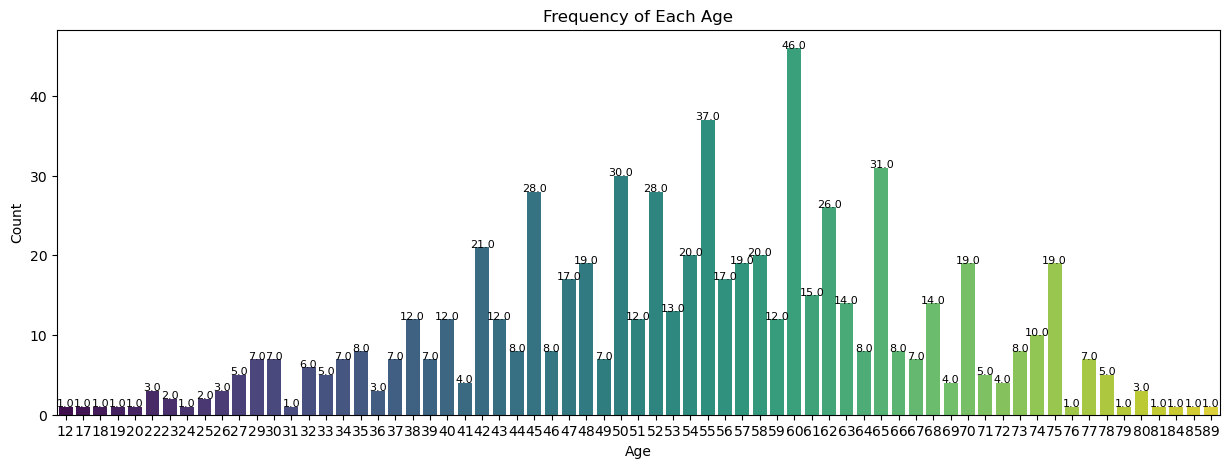

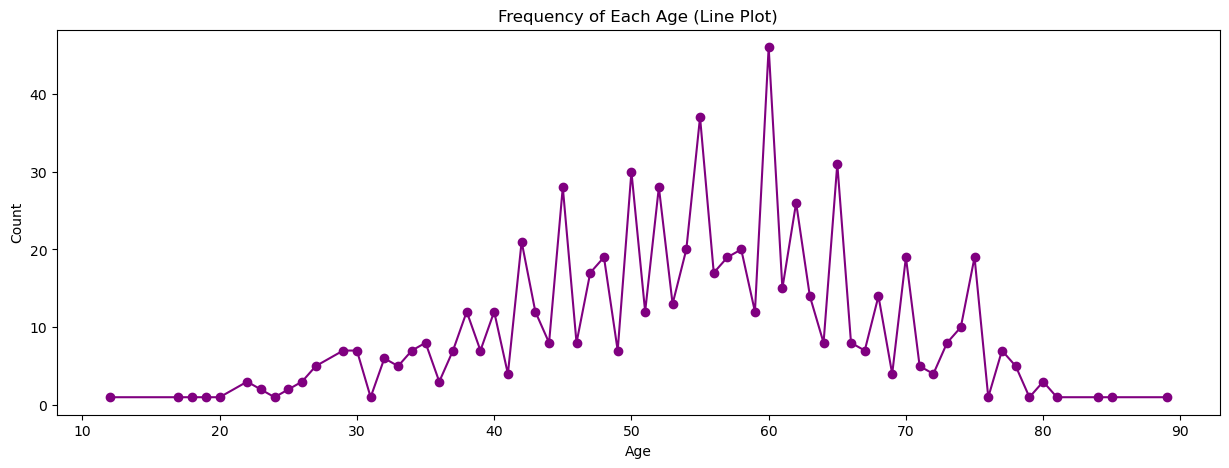

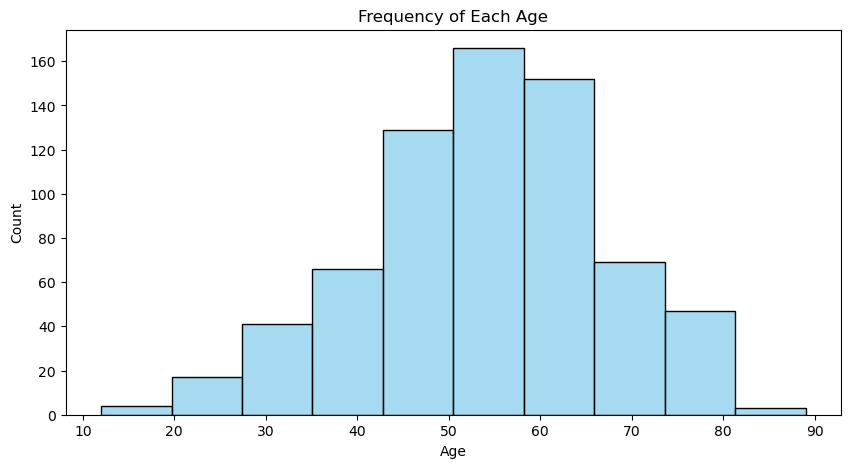

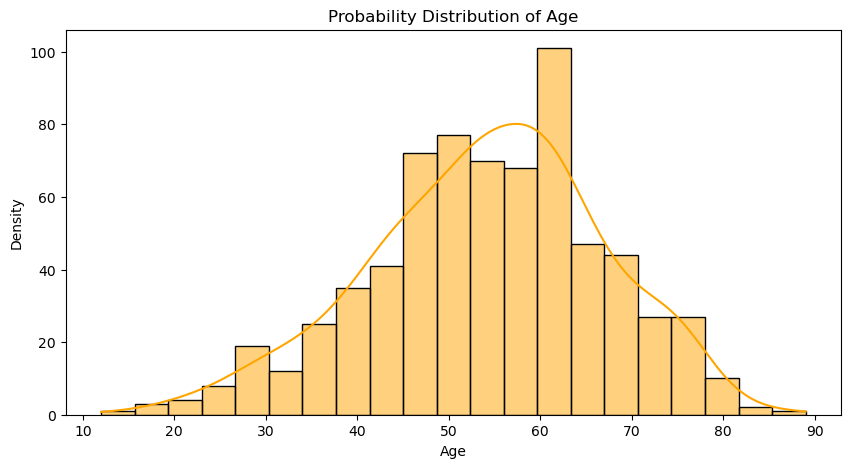

In [83]:
# Plotting the frequency of each age using a bar plot
plt.figure(figsize=(15, 5))
# sns.countplot(x='AGE', data=data, palette='viridis')

ax = sns.countplot(x='AGE', data=data, palette='viridis')
# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')

plt.title('Frequency of Each Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(15, 5))
# sns.lineplot(x=data['AGE'], y=data['AGE'].value_counts().sort_index(), data=df, marker='o', color='purple')
plt.plot(data['AGE'].value_counts().sort_index(), marker='o', color='purple')
plt.title('Frequency of Each Age (Line Plot)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plotting the frequency of each age using a line plot
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], kde=False, color='skyblue', bins=10)
plt.title('Frequency of Each Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plotting the probability distribution (kernel density estimation)
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], kde=True, color='orange')
plt.title('Probability Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [71]:
# naive MI trial

In [115]:
mi1 = [f for f in mi_scores.index if mi_scores[f] > 1.8e-3] # 1.8e-3 arbitrary threshold
mi1.remove("APPROACH")
mi1.remove("SITE")
mi1 += ['SITE_BL', 'SITE_LEFT', 'SITE_RIGHT'] + ['APPROACH_1', 'APPROACH_2', 'APPROACH_3']
X_nt_mi1 = X_nt[mi1]
X_t_mi1 = X_t[mi1]

In [125]:
mi2 = [f for f in mi_scores.index if mi_scores[f] > 3.1e-3] # 1.8e-3 arbitrary threshold
mi2.remove("APPROACH")
mi1 += ['APPROACH_1', 'APPROACH_2', 'APPROACH_3']
X_nt_mi2 = X_nt[mi2]
X_t_mi2 = X_t[mi2]
X_nt_mi2["COMORB"] = X_nt.loc[:, ["CKD", "DM", "HTN"]].sum(axis = 1)
X_t_mi2["COMORB"] = X_t.loc[:, ["CKD", "DM", "HTN"]].sum(axis = 1)

C:\Users\aniru\AppData\Local\Temp\ipykernel_26144\1723507577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_nt_mi2["COMORB"] = X_nt.loc[:, ["CKD", "DM", "HTN"]].sum(axis = 1)
C:\Users\aniru\AppData\Local\Temp\ipykernel_26144\1723507577.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_t_mi2["COMORB"] = X_t.loc[:, ["CKD", "DM", "HTN"]].sum(axis = 1)


In [126]:
X_nt_mi2.columns

Index(['MONTHS', 'AGE', 'MAX DIA', 'GRADE', 'T', 'M', 'IVC INV', 'HEMATURIA',
       'INCIDENTAL', 'COMORB'],
      dtype='object')

In [127]:
param_grid1

{'model__learning_rate': array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
        0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
        0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
        0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
        0.19 , 0.195, 0.2  ]),
 'model__n_estimators': [50, 75, 100, 125, 150],
 'model__max_depth': [3, 4, 5, 6],
 'model__reg_lambda': [0, 0.5, 1, 1.5]}

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__n_estimators': 50, 'model__reg_lambda': 1.5}
Time Taken: 99.3324089050293
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       183
           1       0.56      0.19      0.29        26

    accuracy                           0.88       209
   macro avg       0.73      0.59      0.61       209
weighted avg       0.85      0.88      0.85       209



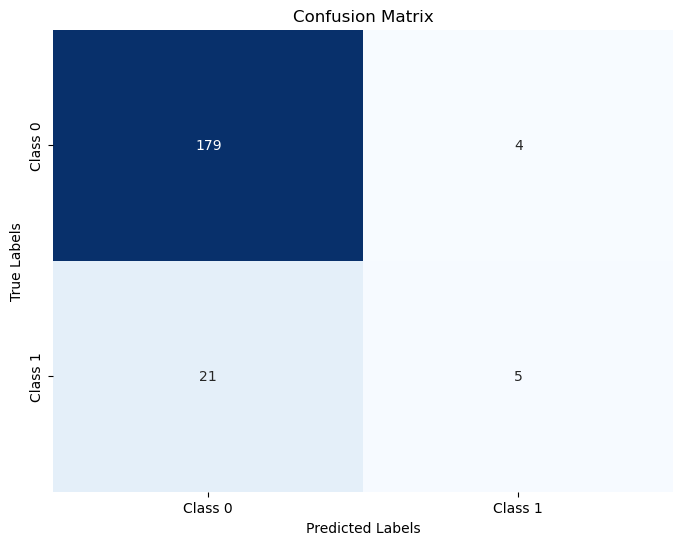

In [129]:
best_params1, best_model1 = grid_searcher(param_grid1, pipeline1, 'matthews_corrcoef', X_nt_mi2, y_nt)
model_test(best_model1, X_t_mi2, y_t)

Fitting 5 folds for each of 5460 candidates, totalling 27300 fits
Best Hyperparameters: {'model__learning_rate': 0.135, 'model__max_depth': 4, 'model__n_estimators': 75, 'model__reg_lambda': 1.5}
Time Taken: 158.2655975818634
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       183
           1       0.67      0.15      0.25        26

    accuracy                           0.89       209
   macro avg       0.78      0.57      0.59       209
weighted avg       0.86      0.89      0.85       209



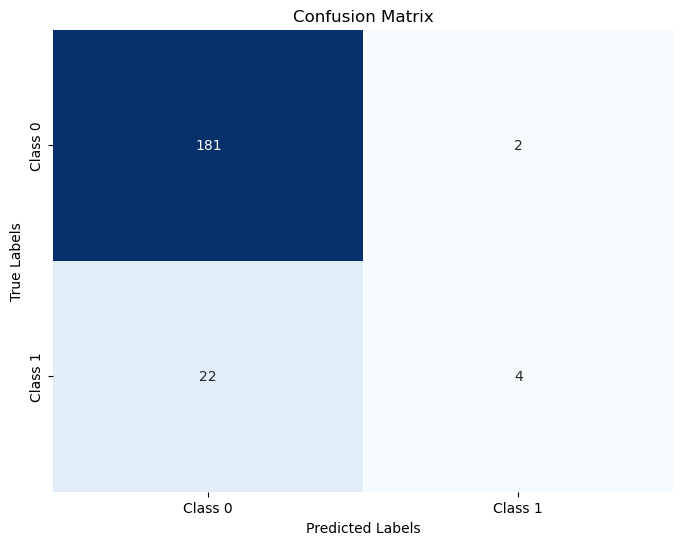

In [134]:
param_grid1a = {
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [75, 100, 125, 150, 175],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [1, 1.5, 2, 2.5, 3, 3.5, 4]
}
best_params1a, best_model1a = grid_searcher(param_grid1a, pipeline1, 'matthews_corrcoef', X_nt_mi2)
model_test(best_model1a, X_t_mi2)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 1.5111379623413086
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       183
           1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209



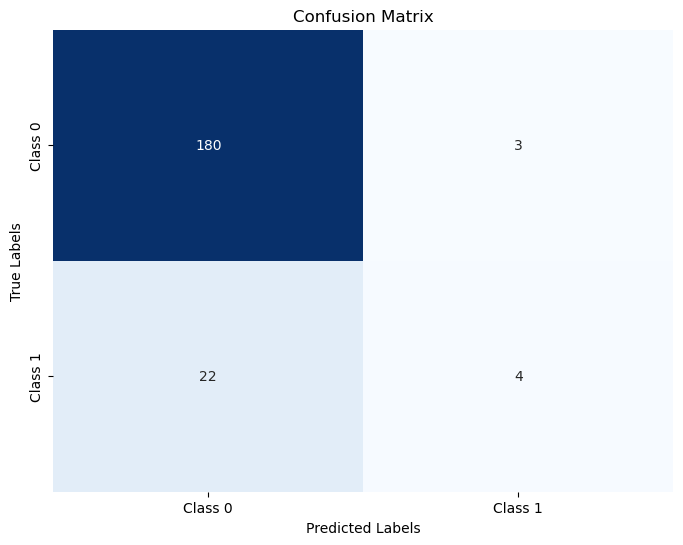

In [105]:
param_grid1b = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1, 'matthews_corrcoef', X_nt_mi1)
model_test(best_model1b, X_t_mi1)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 1.9373042583465576
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



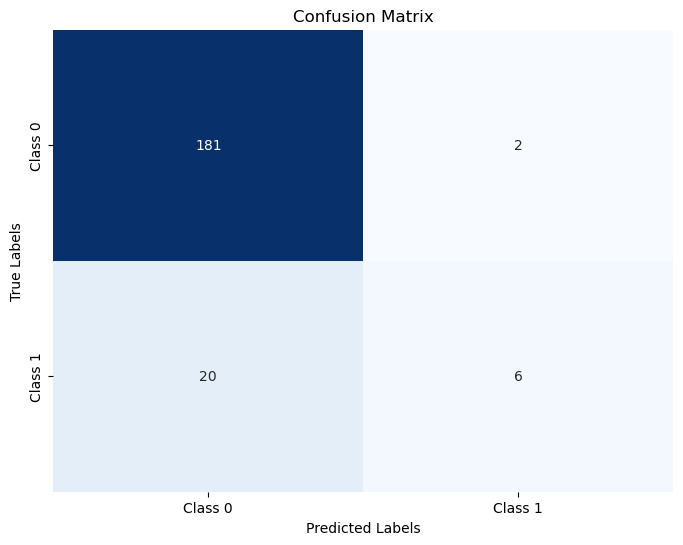

In [106]:
param_grid1ab = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}
best_params1ab, best_model1ab = grid_searcher(param_grid1ab, best_model1a, 'matthews_corrcoef', X_nt_mi1)
model_test(best_model1ab, X_t_mi1)

Fitting 5 folds for each of 6750 candidates, totalling 33750 fits
Best Hyperparameters: {'model__gamma': 0, 'model__lambda': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 1, 'model__scale_pos_weight': 1}
Time Taken: 129.69345831871033
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       183
           1       0.57      0.15      0.24        26

    accuracy                           0.88       209
   macro avg       0.73      0.57      0.59       209
weighted avg       0.85      0.88      0.85       209



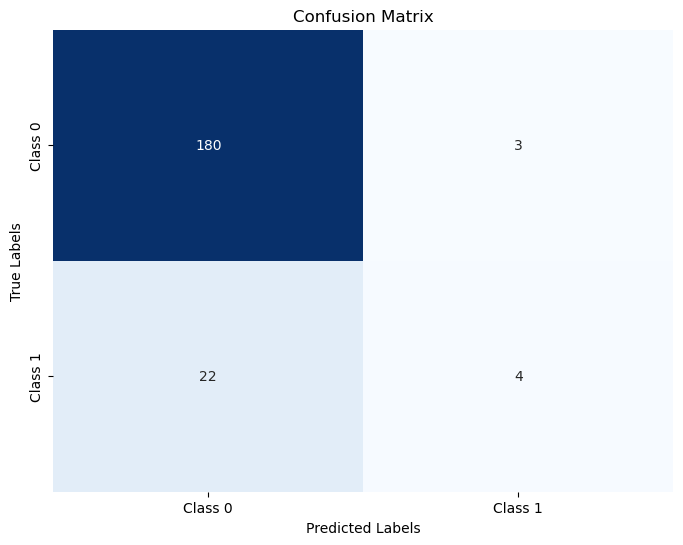

In [107]:
param_grid1c = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [0, 1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__lambda': [0, 0.25, 0.5, 0.75, 1.0 ,1.25, 1.5, 1.75, 2]
}
best_params1c, best_model1c = grid_searcher(param_grid1c, best_model1b, 'matthews_corrcoef', X_nt_mi1)
model_test(best_model1c, X_t_mi1)

Fitting 5 folds for each of 6750 candidates, totalling 33750 fits
Best Hyperparameters: {'model__gamma': 0, 'model__lambda': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 1, 'model__scale_pos_weight': 1}
Time Taken: 168.1681101322174
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



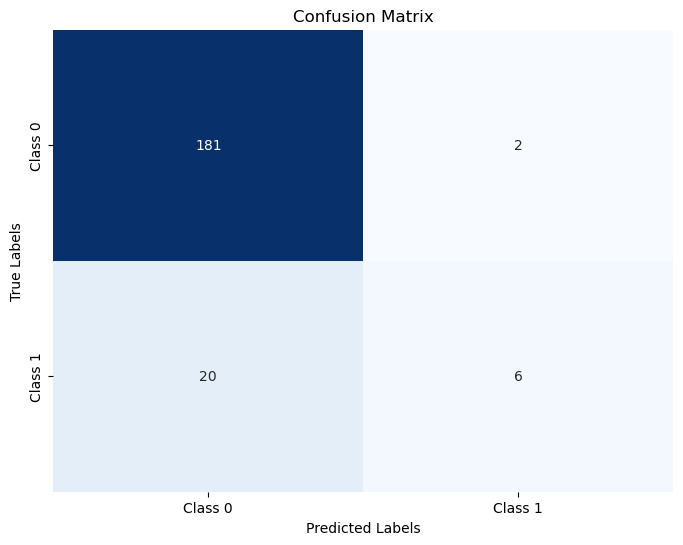

In [108]:
param_grid1ac = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [0, 1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__lambda': [0, 0.25, 0.5, 0.75, 1.0 ,1.25, 1.5, 1.75, 2]
}
best_params1ac, best_model1ac = grid_searcher(param_grid1ac, best_model1ab, 'matthews_corrcoef', X_nt_mi1)
model_test(best_model1ac, X_t_mi1)

Fitting 5 folds for each of 13500 candidates, totalling 67500 fits
Best Hyperparameters: {'model__gamma': 0, 'model__lambda': 0, 'model__max_delta_step': 0, 'model__min_child_weight': 1, 'model__scale_pos_weight': 1}
Time Taken: 337.2036888599396
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       183
           1       0.75      0.23      0.35        26

    accuracy                           0.89       209
   macro avg       0.83      0.61      0.65       209
weighted avg       0.88      0.89      0.87       209



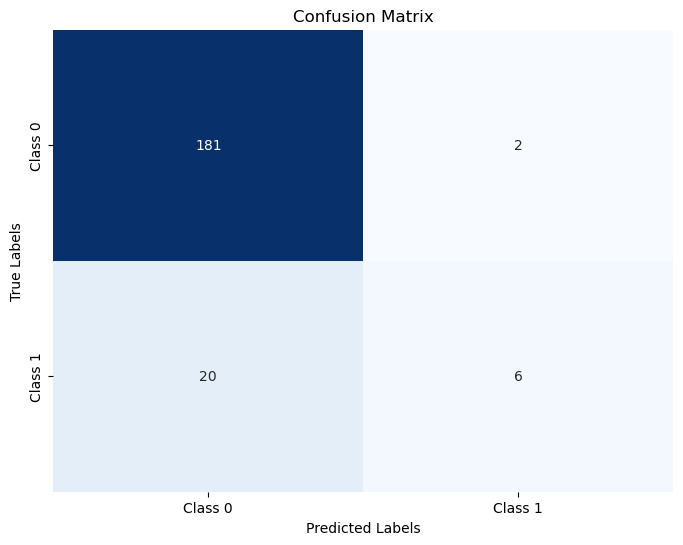

In [109]:
param_grid1ad = {
    'model__min_child_weight': [1, 2, 3, 4, 5], # cover
    'model__gamma': [0, 1, 2, 3, 4, 5],
    'model__scale_pos_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__max_delta_step': [0, 1, 2, 3, 4],
    'model__lambda': [0, 0.25, 0.5, 0.75, 1.0 ,1.25, 1.5, 1.75, 2]
}
best_params1ad, best_model1ad = grid_searcher(param_grid1ad, best_model1ac, 'matthews_corrcoef', X_nt_mi1)
model_test(best_model1ad, X_t_mi1)